# **Assignment 1-Estimation-Hypothesis-Anova**

**Q1**

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/klaxmanbabu/Stats-2/main/Credit.csv?token=AOAAKQP24I5FZ5P4ACP4HDK7TZS4W')

In [ ]:
#function to calculate sample mean distribution (for iteration number of times)
def sampleMeanDist(df, n, iterate):
	#list to hold mean of many samples, each with size n
	meanDistr=[]
	for i in range(iterate):
		#taking n random numbers in a given range
		randomIndex=random.sample(range(0, df.shape[0]), n)

		#taking n random rows of dataframe ie taking a sample size of n
		dtemp=df[ df.index.isin(randomIndex) ]

		#calculating mean of sample and storing it in result list
		meanDistr.append(np.mean(dtemp["Income"]))

	#assuming its mean is normally distributed finding its mean and standard deviation
	mu, std=norm.fit(meanDistr)
	#printing mean and standard deviation
	print (mu, std)
	#returning mean and standard deviation
	return mu, std

In [ ]:
#Reading dataframe
df=pd.read_csv('https://raw.githubusercontent.com/klaxmanbabu/Stats-2/main/Credit.csv?token=AOAAKQP24I5FZ5P4ACP4HDK7TZS4W')

#picking rows with given condition in dataframe
df=df[ ( (df["Married"]=="Yes") ) ]

#resetting the indices of dataframe
df=df.reset_index()

In [ ]:
#population parameters
print ("actual mean and variance ", np.mean(df["Income"]), np.std(df["Income"]))

actual mean and variance  46.21708163265304 36.89464580481464


In [ ]:
#Result dataframe to hold values to be plotted
dfRes=pd.DataFrame(columns=["n", "mean", "std"])

#iterate over all sample sizes: each sample size is taken 100 times
for i in [10, 20, 30, 40, 50]:
  #obtaing sample statistics with sample size i and iteration 100 times
  mu, std=sampleMeanDist(df, i, 100)##Number of times a sample size n is repeated for experimentation
  #adding row into result dataframe
  dfRes.loc[len(dfRes)]=[i, mu, std]

44.347332000000016 9.52890626271326
46.214932499999996 7.375277637426183
46.547786000000016 6.4411233713541
45.654886749999996 5.025330770324297
46.192014799999995 5.091695504384071


      n       mean       std
0  10.0  44.347332  9.528906
1  20.0  46.214932  7.375278
2  30.0  46.547786  6.441123
3  40.0  45.654887  5.025331
4  50.0  46.192015  5.091696


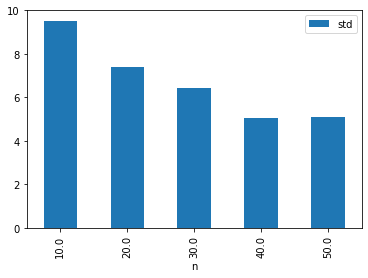

In [ ]:
#Printing result dataframe
print (dfRes)
#Plotting result dataframe
dfRes.plot(x="n", y="std", kind="bar")
plt.show()

**Q2**

In [ ]:
#helper function that takes probability distribution and random variable to return statistics
def stats(prb, X):
	mn, std, var=0, 0, 0
	for i in range(len(X)):
		mn+=prb[i]*X[i]
		var+=prb[i]*X[i]**2
	mn=mn*1.0/len(X)
	var=var*1.0/len(X)
	std=np.sqrt(var)
	return mn, std, var

In [ ]:
#functions taking dataframe and column name to return probability statistics
def prob(df, col):
	lis=df[col].tolist(); lis=list(set(sorted(lis)))
	prbDistr=[]
	df=df.dropna(subset=[col])
	N=df.shape[0]
	for i in lis:
		prbDistr.append(1.0*df[ ( (df[col]==i) ) ].shape[0]/N)
	#print (prbDistr)
	mn, std, var=stats(prbDistr, lis)
	return mn, std, var, prbDistr, lis

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/klaxmanbabu/Stats-2/main/Credit.csv?token=AOAAKQP24I5FZ5P4ACP4HDK7TZS4W')
col, confidence, size="Cards", 0.95, 45
df=pd.read_csv('https://raw.githubusercontent.com/klaxmanbabu/Stats-2/main/Credit.csv?token=AOAAKQP24I5FZ5P4ACP4HDK7TZS4W')
col=col
#As population variance is unknown using t-distribution table for alpha
alpha=(1-confidence)*1.0/2; alphaZ=1.684#alphaz approx. taken

#calculating the probability distribution of cards ie probability distribution of holding 1 card, 2 cards ...so on
mn, std, var, prb, lis=prob(df, col)
#printing random variable possible outcomes
print ("\n\n")
print ("random variable", lis)
#printing probability distribution of above random variable and showing it sums to 1
print ("prob distr", prb, sum(prb))
#printing mean, standard deviation and variance
print ("mean std var of distribution", mn, std, var, "\n\n")

#taking a random sample

#obtaing size numbers of random numbers
randomIndex=random.sample(range(0, df.shape[0]), size)
#obtaining only those selected random indices from dataframe hence getting the random sample
dSample=df[[col]][ df.index.isin(randomIndex) ]
#sample's statistics mean, standard deviation
mn, std=np.mean(dSample[col]), np.std(dSample[col])

#formula:- sample.mean-t.alpha/2*sample.std/sqrt(n) <  population.mean < sample.mean+t.alpha/2*sample.std/sqrt(n)

print ("sample:- confidence interval for population mean", mn-alphaZ*std/np.sqrt(size), mn+alphaZ*std/np.sqrt(size))




random variable [1, 2, 3, 4, 5, 6, 7, 8, 9]
prob distr [0.1275, 0.2875, 0.2775, 0.18, 0.085, 0.0275, 0.01, 0.0025, 0.0025] 0.9999999999999999
mean std var of distribution 0.3286111111111111 1.0864058991821508 1.1802777777777778 


sample:- confidence interval for population mean 2.5598957317355384 3.173437601597795


**Q3.a**

In [ ]:
import math as mh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rm



In [ ]:
creditDF = pd.read_csv('https://raw.githubusercontent.com/klaxmanbabu/Stats-2/main/Credit.csv?token=AOAAKQP24I5FZ5P4ACP4HDK7TZS4W')

creditDF.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [ ]:
rm.seed(986109006)
n10 = creditDF.sample(n=10, replace = False)
n20 = creditDF.sample(n=20, replace = False)
n30 = creditDF.sample(n=30, replace = False)
n40 = creditDF.sample(n=40, replace = False)
n50 = creditDF.sample(n=50, replace = False)

In [ ]:
n10Married = n10[n10.Married=='Yes']
n20Married = n20[n20.Married=='Yes']
n30Married = n30[n30.Married=='Yes']
n40Married = n40[n40.Married=='Yes']
n50Married = n50[n50.Married=='Yes']

In [ ]:
n10MuSigma = round(n10Married["Income"].agg([np.sum, np.mean, np.std]), 2)
n20MuSigma = round(n20Married["Income"].agg([np.sum, np.mean, np.std]), 2)
n30MuSigma = round(n30Married["Income"].agg([np.sum, np.mean, np.std]), 2)
n40MuSigma = round(n40Married["Income"].agg([np.sum, np.mean, np.std]), 2)
n50MuSigma = round(n50Married["Income"].agg([np.sum, np.mean, np.std]), 2)
nMuSigma = pd.DataFrame({1: n10MuSigma, 2: n20MuSigma, 3:n30MuSigma, 4:n40MuSigma, 5:n50MuSigma})
nMuSigma = nMuSigma.T
nMuSigma.insert(0, "n", [10, 20, 30, 40, 50], True)

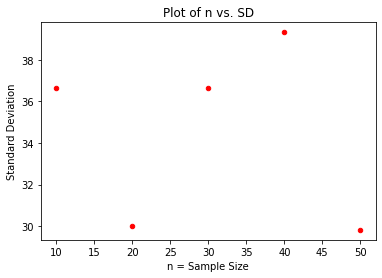

    n      sum   mean    std
1  10   298.05  49.68  36.63
2  20   869.84  51.17  30.02
3  30   590.24  29.51  36.65
4  40  1193.09  51.87  39.33
5  50  1397.38  45.08  29.82


In [ ]:
nMuSigma.plot(kind = 'scatter', x = 'n', y = 'std', color = 'red')
plt.title('Plot of n vs. SD')
plt.xlabel('n = Sample Size')
plt.ylabel('Standard Deviation')
plt.show()
print(nMuSigma)

**Q3.b**

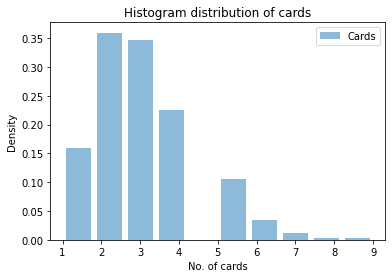

In [ ]:
creditDF[['Cards']].plot(kind='hist', alpha = 0.5, density = True, rwidth=0.8)
plt.title('Histogram distribution of cards')
plt.xlabel('No. of cards')
plt.ylabel('Density')
plt.show()

In [ ]:
cardsMuSigma = round(creditDF["Cards"].agg([np.mean, np.std]), 2)

print(cardsMuSigma)

mean    2.96
std     1.37
Name: Cards, dtype: float64


In [ ]:
rm.seed(986109006)
n45 = creditDF.sample(n=45, replace = False)

In [ ]:
ci = 0.95
n = len(n45)
cardsSampleMu = np.mean(n45["Cards"])
cardsSampleSD = np.std(creditDF["Cards"])
cardsSE = cardsSampleSD/mh.sqrt(n)

lowerCI = round((cardsSampleMu - (1.96 * cardsSE)), 2)
upperCI = round((cardsSampleMu + (1.96 * cardsSE)), 2)

#print(n, cardsSampleMu, cardsSampleSD, cardsSE)

print(lowerCI, upperCI)


2.38 3.18


**Q3.c**

In [ ]:
rm.seed(986109006)

A = creditDF.sample(n=200, replace=False)
A["Sample"] = "A"

B = creditDF.sample(n=250, replace=False)
B["Sample"] = "B"

C = creditDF.sample(n=150, replace=False)
C["Sample"] = "C"


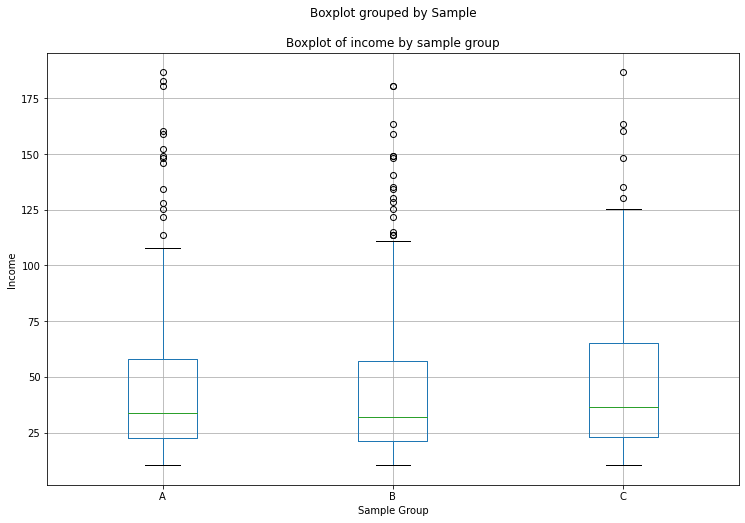

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 sum_sq     df         F    PR(>F)
Sample      1265.395698    2.0  0.489835  0.612973
Residual  771117.283289  597.0       NaN       NaN


In [ ]:
ABC = pd.concat([A, B, C])

ABC.boxplot('Income', by='Sample', figsize=(12, 8))
plt.title('Boxplot of income by sample group')
plt.xlabel('Sample Group')
plt.ylabel('Income')
plt.show()

import statsmodels.api as sm
from statsmodels.formula.api import ols

rm.seed(986109006)

aovFit1 = ols('Income ~ Sample', data = ABC).fit()
               
aovTable1 = sm.stats.anova_lm(aovFit1, typ=2)
print(aovTable1)


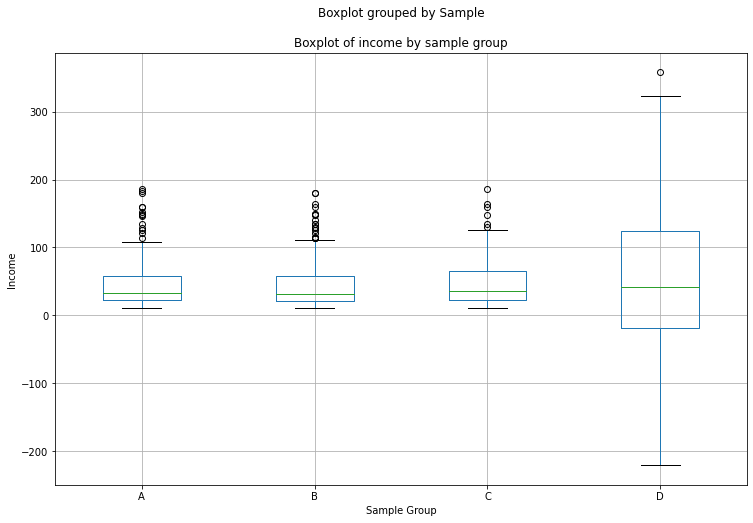

                sum_sq     df         F    PR(>F)
Sample    4.050473e+03    3.0  0.317879  0.812462
Residual  3.593295e+06  846.0       NaN       NaN


In [ ]:
SampleGrandMu = round(np.mean(ABC["Income"]), 2)
SampleSTD = round(np.std(ABC["Income"]), 2)

#print(SampleGrandMu, SampleSTD)

rm.seed(986109006)
D = round(pd.DataFrame((np.random.normal(SampleGrandMu, 3*SampleSTD, 250))),3)
D = D.rename(columns={0: 'Income'})
D["Sample"] = "D"

#print(D)

ABCD = pd.concat([A, B, C, D])

ABCD.boxplot('Income', by='Sample', figsize=(12, 8))
plt.title('Boxplot of income by sample group')
plt.xlabel('Sample Group')
plt.ylabel('Income')
plt.show()

rm.seed(986109006)

aovFit2 = ols('Income ~ Sample', data = ABCD).fit()
               
aovTable2 = sm.stats.anova_lm(aovFit2, typ=2)
print(aovTable2)